In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from ngram import *
from baselines import *
import seaborn as sns

In [3]:
d = load_annotations()

In [13]:
cols = ['rev_id', 'clean_diff', 'aggression', 'recipient','attack']
b = d['user']['blocked'].dropna(subset=cols)[cols]
r = d['user']['random'].dropna(subset=cols)[cols]

In [16]:
def plot(d, label):
    if label == 'aggression_score':
        bins = range(-3, 4)
    else:
        bins = np.arange(0, 1.1, 0.1)
       
    def nice_hist(myarray):
        results, edges = np.histogram(myarray, normed=True)
        binWidth = edges[1] - edges[0]
        plt.bar(edges[:-1], results*binWidth, binWidth)

    nice_hist(d[label].values)
    #_ = plt.hist(d[label].values,  bins = bins, normed = True )
    plt.xlabel('%s raw annotations' % label)
    plt.ylabel('fraction')

    plt.figure()
    #_ = plt.hist(d.groupby('rev_id')[label].mean().values,  bins = bins)
    nice_hist(d.groupby('rev_id')[label].mean().values)
    plt.xlabel('%s mean' % label)
    plt.ylabel('fraction')

    plt.figure()
    #_ = plt.hist(plurality(d[label]).values, bins = bins)
    nice_hist(plurality(d[label]).values)
    plt.xlabel('%s plurailty' % label)
    plt.ylabel('fraction')


    """
    d['std'] = d.groupby('rev_id')[label].std()
    plt.figure()
    ax = sns.pointplot(x=label, y= 'std', data=d, order = [-3, -2, -1, 0, 1, 2, 3])
    plt.xlabel('raw annotations')
    """



    plt.figure()
    d_temp = pd.DataFrame({'mean': d.groupby('rev_id')[label].mean(), 'std': d.groupby('rev_id')[label].std()})
    ax = sns.regplot(x='mean', y= 'std', data=d_temp,lowess = True)



    plt.figure()
    d_temp = pd.DataFrame({'plurality': plurality(d[label]), 'std': d.groupby('rev_id')[label].std()})
    ax = sns.pointplot(x='plurality', y= 'std', data=d_temp, order = bins)

# Recipient

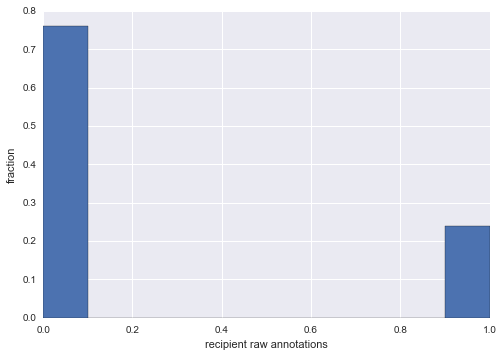

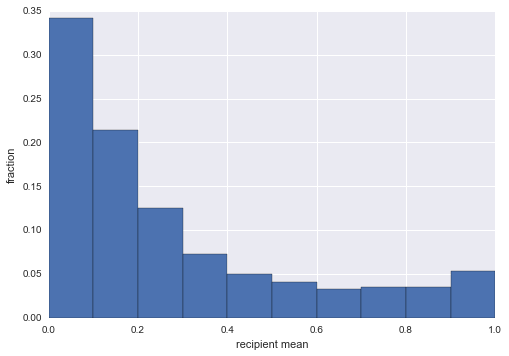

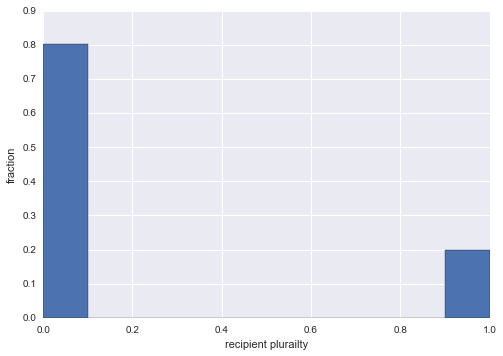

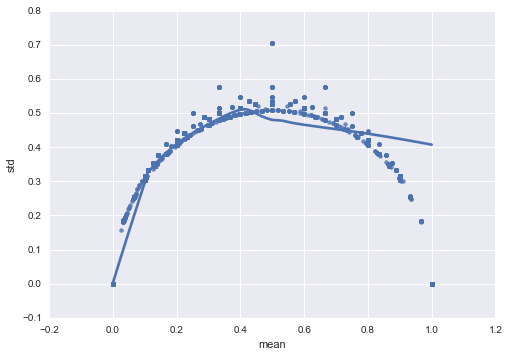

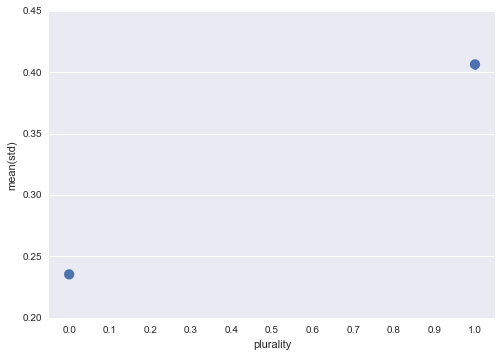

In [17]:
 plot(b, 'recipient')

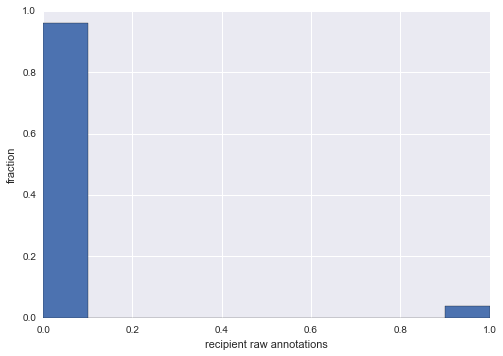

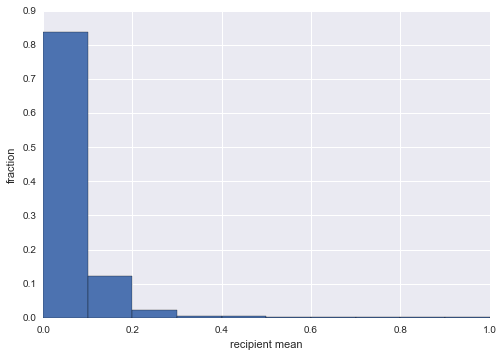

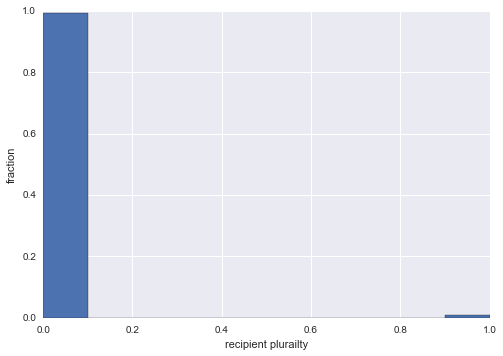

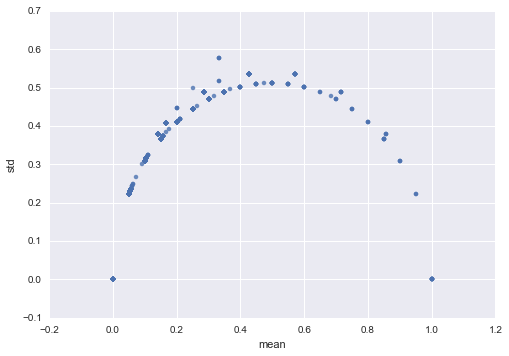

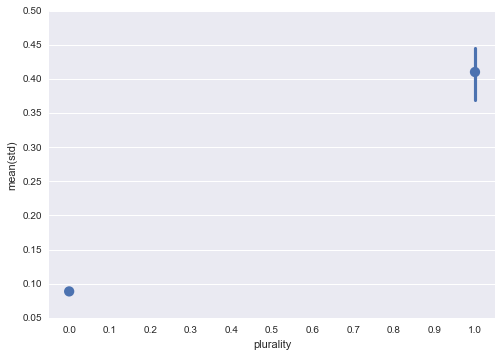

In [6]:
 plot(r, 'recipient')

# Aggression

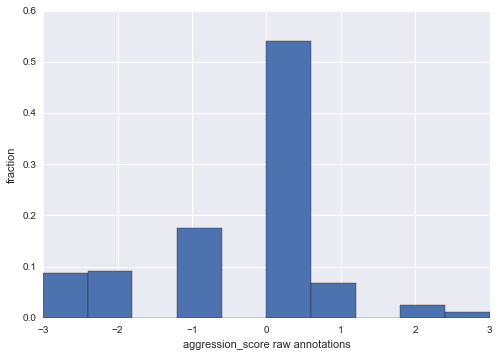

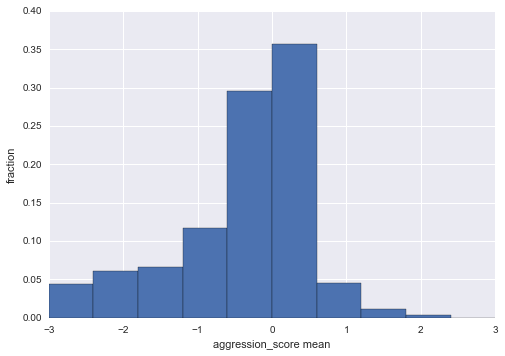

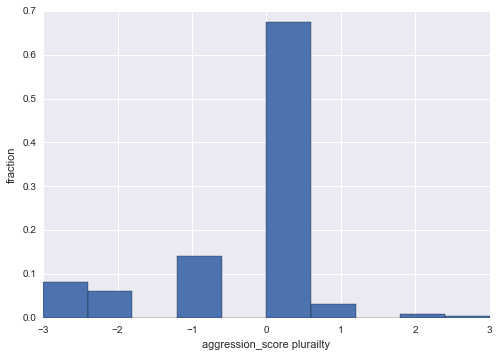

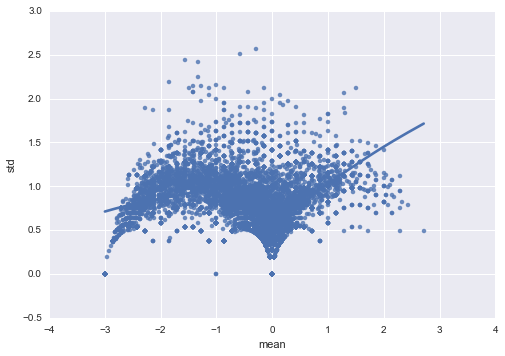

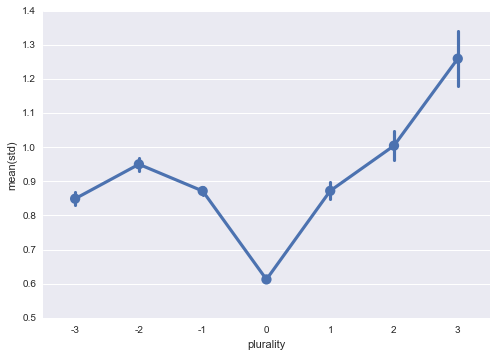

In [34]:
 plot(b, 'aggression_score')

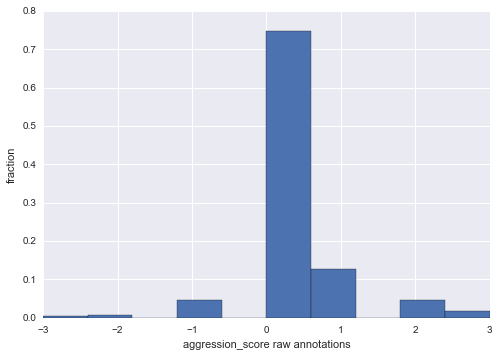

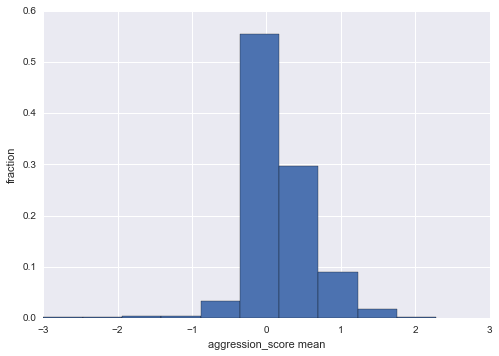

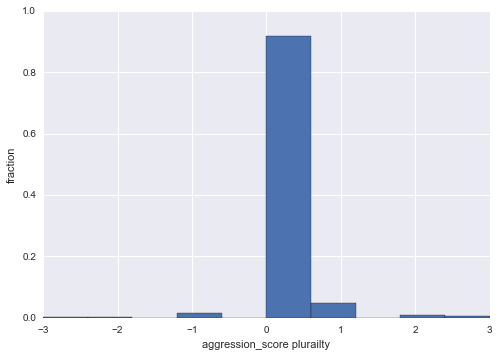

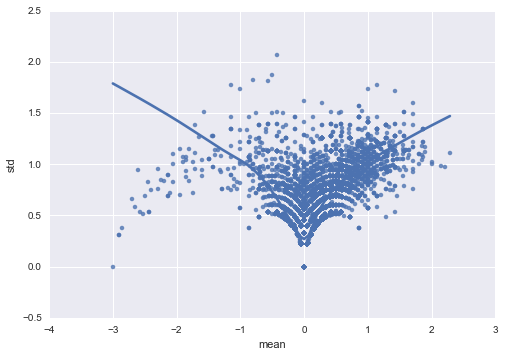

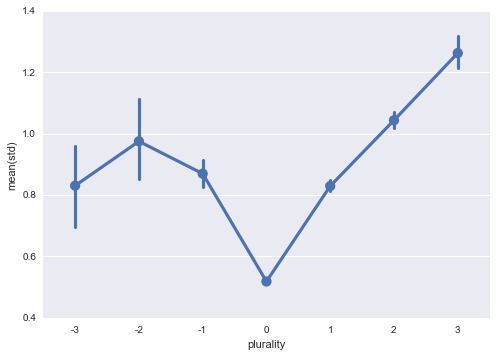

In [36]:
 plot(r, 'aggression_score')